In [2]:
#importing libr
import numpy as np
import joblib
import os

from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [3]:
#preparing data 

path = './features/features_mu_ew23_accdata_9_2_1710-1736.csv'
data = np.loadtxt(path, delimiter=',')

x_data = data[:, :-1]
y_data = data[:, -1]
x_data = preprocessing.scale(x_data)



In [4]:
#preparing data 
fpattern = 'features_mw'
directory = './features'
files = list(filter(lambda x : x.startswith(fpattern), os.listdir(directory)))
files = list(map(lambda x : directory + '/' + x, files))
res = {
    'baseline' : [],
    'logit': [],
    'rf': [],
}

for fname in files:
    #path = './features/features_mu_ew23_accdata_9_2_1710-1736.csv'
    data = np.loadtxt(fname, delimiter=',')

    x_data = data[:, :-1]
    y_data = data[:, -1]
    x_data = preprocessing.scale(x_data)

#loading models
    SEED = 1
    np.random.seed(SEED)
    models = [] 
    for key in ['baseline', 'logit', 'rf']:
        path = 'trained_models/' + key + '.joblib'
        #models.append((key, joblib.load(path)))
        clf = joblib.load(path)
        '''
        rskf = RepeatedStratifiedKFold(n_splits=10, 
                                    n_repeats=10,
                                    random_state=SEED)
        for i, (train, test) in enumerate(rskf.split(x_data, y_data)):
            x_train, x_test = x_data[train], x_data[test]
            y_train, y_test = y_data[train], y_data[test]
            clf.fit(x_train, y_train)
            y_pred = clf.predict(x_test)
            _f1 = metrics.f1_score(y_test, y_pred, average='weighted')
            _acc = metrics.accuracy_score(y_test, y_pred)
            #y_proba = clf.predict_proba(x_test)
            #roc_auc = metrics.roc_auc_score(y_test, y_proba[:, 1], average='weighted', multi_class='ovo')
            print(_acc, _f1)
        '''
        y_pred = clf.predict(x_data)
        #_f1 = metrics.f1_score(y_data, y_pred, average='weighted')
        _acc = metrics.accuracy_score(y_data, y_pred)
        res[key].append(_acc)
        y_proba = clf.predict_proba(x_data)
        #_roc_auc = metrics.roc_auc_score(y_data, y_proba[:, 1], average='weighted', multi_class='ovo')
for item in res.items():
    print(item[0], np.mean(item[1])) 

baseline 0.33010018597800855
logit 0.32777634054276056
rf 0.36081903992005115


In [36]:
#extract time heart-rate and label from raw data
folder_in = './walking_data/'
folder_out = './heart_rate/'

files = os.listdir(folder_in)

for file in files:
    data = np.genfromtxt(folder_in + file, delimiter = ',', skip_header = 1)
    emotion = data[:,1]
    heart_rate = data[:,-1]
    index = range(len(data))
    document = np.column_stack((index, heart_rate, emotion))
    np.savetxt('{}{}'.format(folder_out, file), document, delimiter=',', header='index,heart,emotion', fmt='%s')


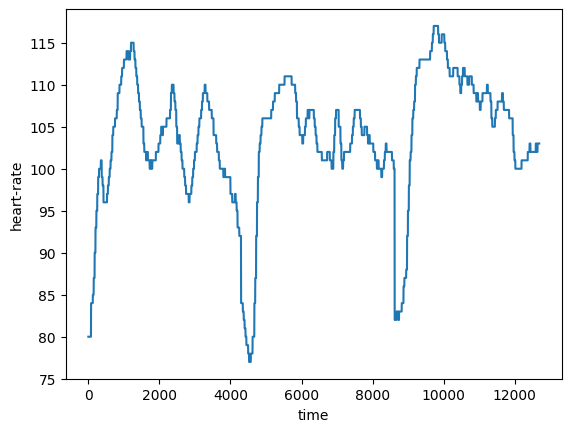

In [3]:
#plotting the heart-rate
import matplotlib.pyplot as plt

directory = './heart_rate/'
files = list(map(lambda x : directory + x, os.listdir(directory)))

data = np.genfromtxt(files[2], delimiter=',', skip_header = 1)
x = data[:,0]
y = data[:,1]

plt.plot(x, y, label='Heart-Rate')
plt.xlabel('time')
plt.ylabel('heart-rate')
plt.show()
